In [1]:
#Carga de datos
import pandas as pd

df = pd.read_csv('financial_sample.csv', sep=';', encoding='latin-1')

In [2]:
#Limpieza de datos:
df.columns = df.columns.str.strip()
columnas_dinero = ['Units Sold, Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']

def limpiar_formato_latino(valor):
    valor = str(valor)

    if '-' in valor and len(valor) < 5:
        return 0.0
    
    valor = valor.replace('$','')
    valor = valor.replace('.','')
    valor = valor.replace(',','.')
    valor = valor.strip()

    try:
        return float(valor)
    except:
        return 0.0
    
for col in columnas_dinero:
    if col in df.columns:
        df[col] = df[col].apply(limpiar_formato_latino)

In [3]:
#¿Qué país vendió más?
ventas_por_pais = df.groupby('Country')['Sales'].sum()
ventas_por_pais = ventas_por_pais.sort_values(ascending=False)
ventas_por_pais.apply(lambda x: f"${x:,.2f}")

Country
United States of America    $25,029,830.18
Canada                      $24,887,654.89
France                      $24,354,172.29
Germany                     $23,505,340.82
Mexico                      $20,949,352.11
Name: Sales, dtype: object

In [4]:
#Arreglo, pasar de objet type a datetime type
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

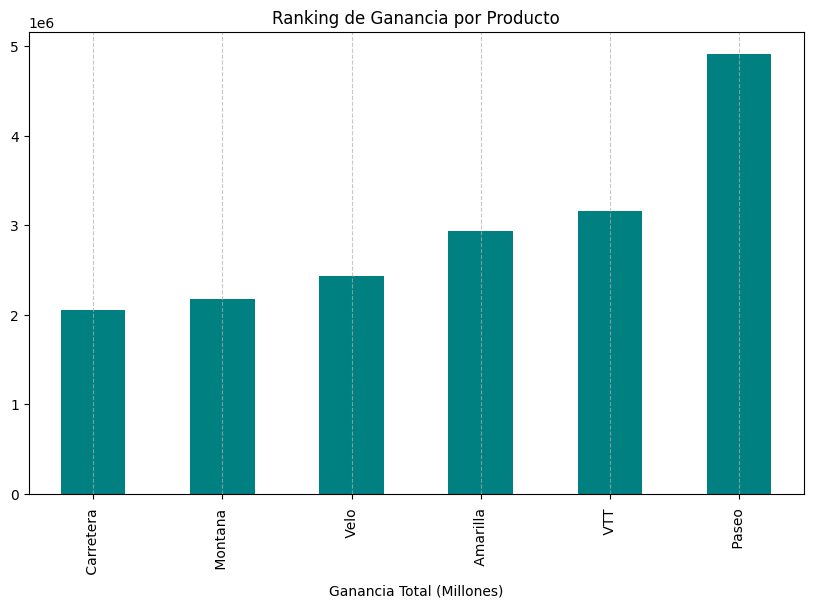

In [5]:
# %matplotlib inline hace que los gráficos se vean dentro del notebook
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Agrupamos datos: Producto vs. Ganancia (Profit)
ganancia_producto = df.groupby('Product')['Profit'].sum().sort_values(ascending=True)

# 2. Creamos el gráfico de BARRAS HORIZONTALES (barh)
plt.figure(figsize=(10, 6)) # Tamaño del gráfico
ganancia_producto.plot(kind='bar', color='teal')

# 3. Decoración
plt.title('Ranking de Ganancia por Producto')
plt.xlabel('Ganancia Total (Millones)')
plt.grid(axis='x', linestyle='--', alpha=0.7) # Cuadrícula suave

plt.show()

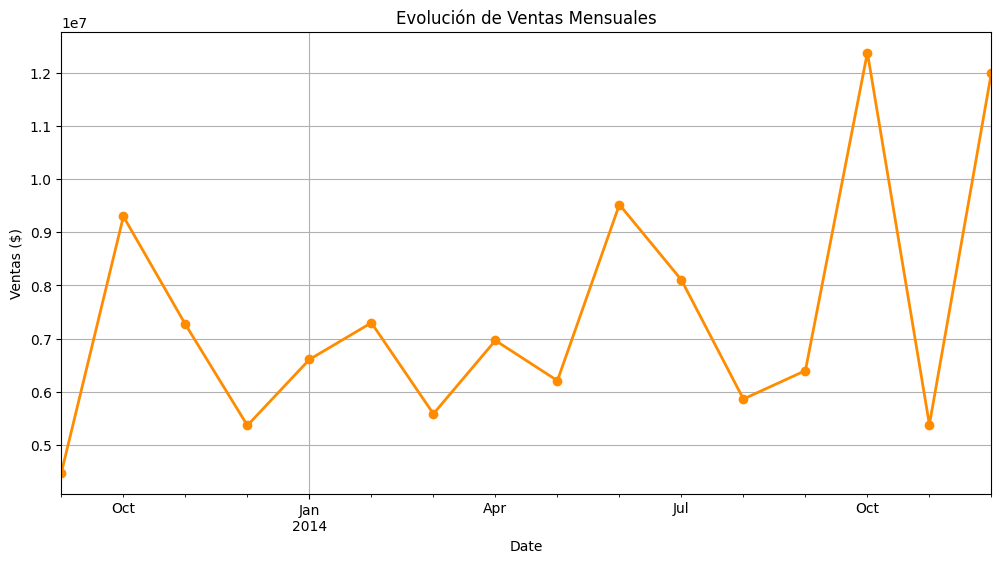

In [6]:
ventas_tiempo = df.set_index('Date').resample('ME')['Sales'].sum()

plt.figure(figsize=(12,6))
ventas_tiempo.plot(kind='line',marker='o',color='darkorange',linewidth=2)

plt.title('Evolución de Ventas Mensuales')
plt.ylabel('Ventas ($)')
plt.grid(True)

plt.show()

In [7]:
# Guardamos el DataFrame limpio en un nuevo archivo Excel
# index=False evita que se guarde la columna de números de fila (0, 1, 2...)
df.to_excel('Reporte_Financiero_Limpio.xlsx', index=False)

print("¡Exportación exitosa! Busca el archivo en la carpeta de tu proyecto.")

¡Exportación exitosa! Busca el archivo en la carpeta de tu proyecto.
